# 0. Setup and Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_squared_error, r2_score


#1. Load and explore dataset

Dataset from [here](https://www.kaggle.com/datasets/fedesoriano/california-housing-prices-data-extra-features)

In [ ]:
df = pd.read_csv('California_Houses.csv')

In [ ]:
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [ ]:
df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

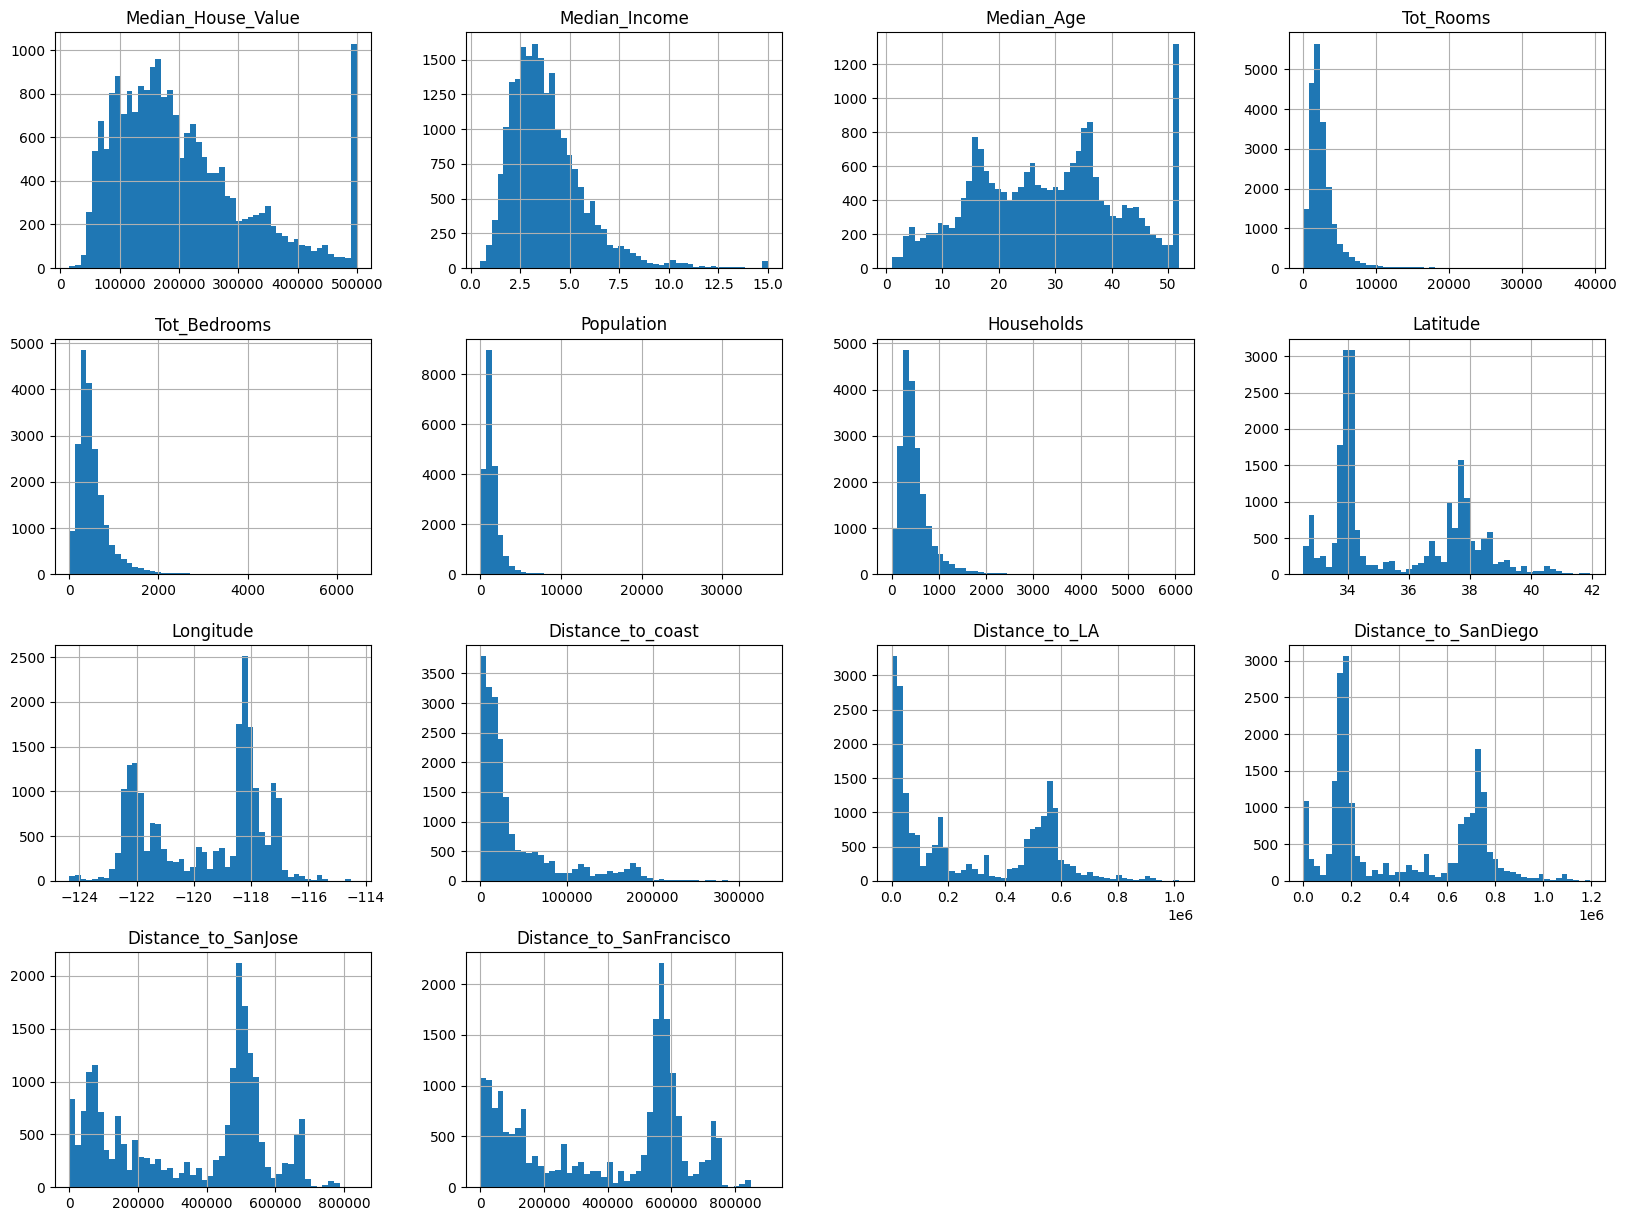

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

#2. Prepare and Preprocess Data

Dataset has no null values, so no need for imputer or specific data cleaning of columns.

However, we can do some feature engineering to include more relevant features. This dataset includes housing data on districts, not individual households. So attributes like total rooms, total bedrooms, and population can be turned into per household stats to be more relevant

In [ ]:
df['rooms_per_household'] = df['Tot_Rooms']/df['Households']
df['bedrooms_per_household'] = df['Tot_Bedrooms']/df['Households']
df['population_per_household'] = df['Population']/df['Households']

## Final Clean Data Pipeline

In [ ]:
X = df.drop('Median_House_Value', axis=1)
y = df['Median_House_Value'].copy()

In [ ]:
X.head()

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,rooms_per_household,bedrooms_per_household,population_per_household
0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767,6.984127,1.023810,2.555556
1,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400,6.238137,0.971880,2.109842
2,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450,8.288136,1.073446,2.802260
3,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,5.817352,1.073059,2.547945
4,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,6.281853,1.081081,2.181467


In [ ]:
y.head()

,Median_House_Value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


Split data into training and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

# split into training + test (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Use `StandardScaler` to scale the data

In [ ]:
scaler = StandardScaler()

# Fit StandardScaler on training data
X_train_scaled = scaler.fit_transform(X_train)

# apply to test data
X_test_scaled = scaler.transform(X_test)

# 3. Linear Regression

Normal Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred_lin_reg = lin_reg.predict(X_test_scaled)

In [ ]:
mse_lin = mean_squared_error(y_test, y_pred_lin_reg)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin_reg)

print(f"Root Mean Squared Error (RMSE): {rmse_lin:.4f}")
print(f"R2 Score: {r2_lin:.4f}")

Root Mean Squared Error (MSE): 69888.1578
R² Score: 0.6273


# 4. SVM Regressor

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 30, 100]
}

svr_linear = SVR(kernel='linear')

grid_search = GridSearchCV(
    estimator=svr_linear,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# Evaluate best model
best_svr_linear = grid_search.best_estimator_
y_pred = best_svr_linear.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Best C:", grid_search.best_params_['C'])
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best C: 37.55401188473625
Linear SVR RMSE: 73949.47
Linear SVR R²: 0.5827


In [ ]:
from sklearn.svm import SVR

svr_linear = SVR(kernel='linear')

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 30, 100]
}

grid_search = GridSearchCV(
    estimator=svr_linear,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=SVR(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 30, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
best_svr = grid_search.best_estimator_
y_pred_svr = best_svr.predict(X_test_scaled)

mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Best C:", grid_search.best_params_['C'])
print(f"RMSE: {rmse_svr:.2f}")
print(f"R2: {r2_svr:.4f}")

Best C: 100
Linear SVR RMSE: 72114.63
Linear SVR R²: 0.6031


# 5. KNN Regressor

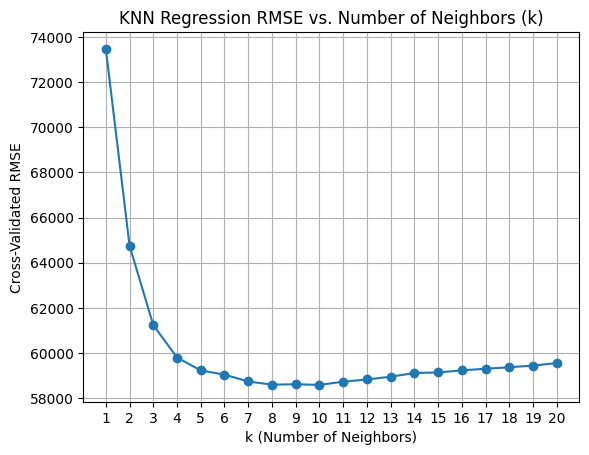

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

k_values = range(1, 21)
rmses = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    neg_mse_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = [np.sqrt(-mse) for mse in neg_mse_scores]
    rmses.append(sum(rmse_scores) / len(rmse_scores))

plt.plot(k_values, rmses, marker='o')
plt.title('KNN Regression RMSE vs. Number of Neighbors (k)')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Cross-Validated RMSE')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Choose k= for our final regressor.

In [ ]:
knn_final = KNeighborsRegressor(n_neighbors=8)
knn_final.fit(X_train_scaled, y_train)

y_pred_knn = knn_final.predict(X_test_scaled)

rmse_knn = sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print(f"RMSE: {rmse_knn:.3f}")
print(f"R2 Score: {r2_knn:.4f}")

RMSE: 58070.112
R² Score: 0.7427


# 6. MLP Regressor (Neural Networks)

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    max_iter=1000,
    early_stopping=True,
    learning_rate_init=0.001,
    random_state=42
)
mlp_reg.fit(X_train_scaled, y_train)

y_pred_mlp = mlp_reg.predict(X_test_scaled)

rmse_mlp = sqrt(mean_squared_error(y_test, y_pred_mlp))
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"RMSE: {rmse_mlp:.3f}")
print(f"R2 Score: {r2_mlp:.4f}")

RMSE: 56279.042
R² Score: 0.7583
